## About dataset:
It is taken from Kaggle. It contains measurements of Iris flower species, namely, setosa, versicolor and virginica. The objective of this project is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

Dataset link: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

## Problem Statement:
Classify Iris flower into different species based on their sepal and petal measurements.

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Explore data

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Finding missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

3

## Observation
* There are 150 rows and 5 columns.
* Except 'species' column, all other columns are numerical.
* There are no missing values.
* There are 3 duplicates in the data.

## Data Preprocessing

* ### Dropping duplicates

In [7]:
df.drop_duplicates(inplace=True)
# View changed shape
df.shape

(147, 5)

* ### Convert categorical column 'species' into numerical

In [8]:
# See values
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

In [9]:
# Changing categorical column into numerical
df['species'] = df['species'].replace({'Iris-versicolor':0,'Iris-virginica':1,'Iris-setosa':2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


## Data Visualization

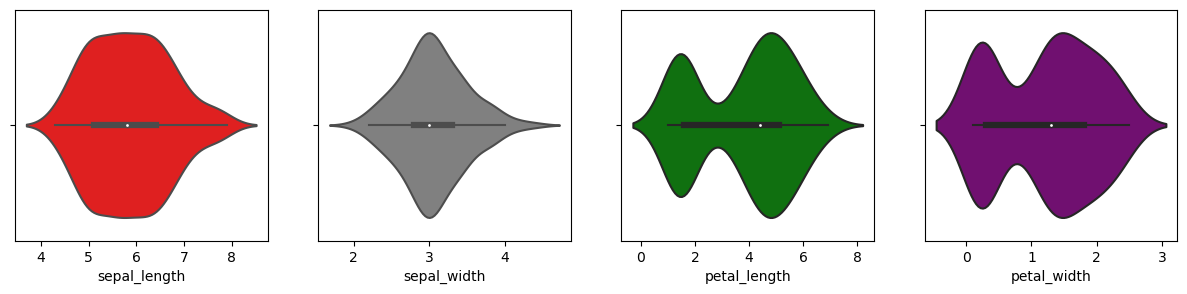

In [10]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['red', 'gray', 'green', 'purple']
plt.figure(figsize=(15,3))
for i in range (4):
    plt.subplot(1,4,i+1)
    sns.violinplot(df[col[i]], color=colors[i])
plt.show()

* The sepal_length values are in range of 5 to 7.
* The sepal_width values are largely concentrated around 3.
* The petal_length values are concentrated in between 1 to 2 and 4 to 6.
* The petal_width values are concentrated in between 0 to 0.5 and 1 to 2.5.

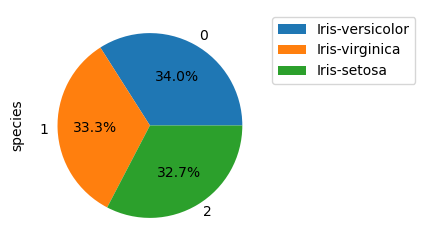

In [11]:
plt.figure(figsize=(3,3))
df['species'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.legend(['Iris-versicolor','Iris-virginica','Iris-setosa'], bbox_to_anchor = (1,1))
plt.show()

Maximum flowers are of versicolor species.

<AxesSubplot:>

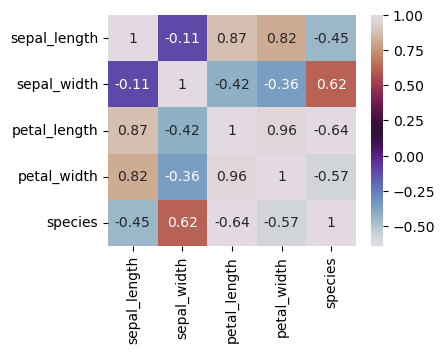

In [12]:
plt.figure(figsize=(4,3))
sns.heatmap(df.corr(), annot=True, cmap = 'twilight')

Target column 'species' is strongly correlated to 'sepal_width'.

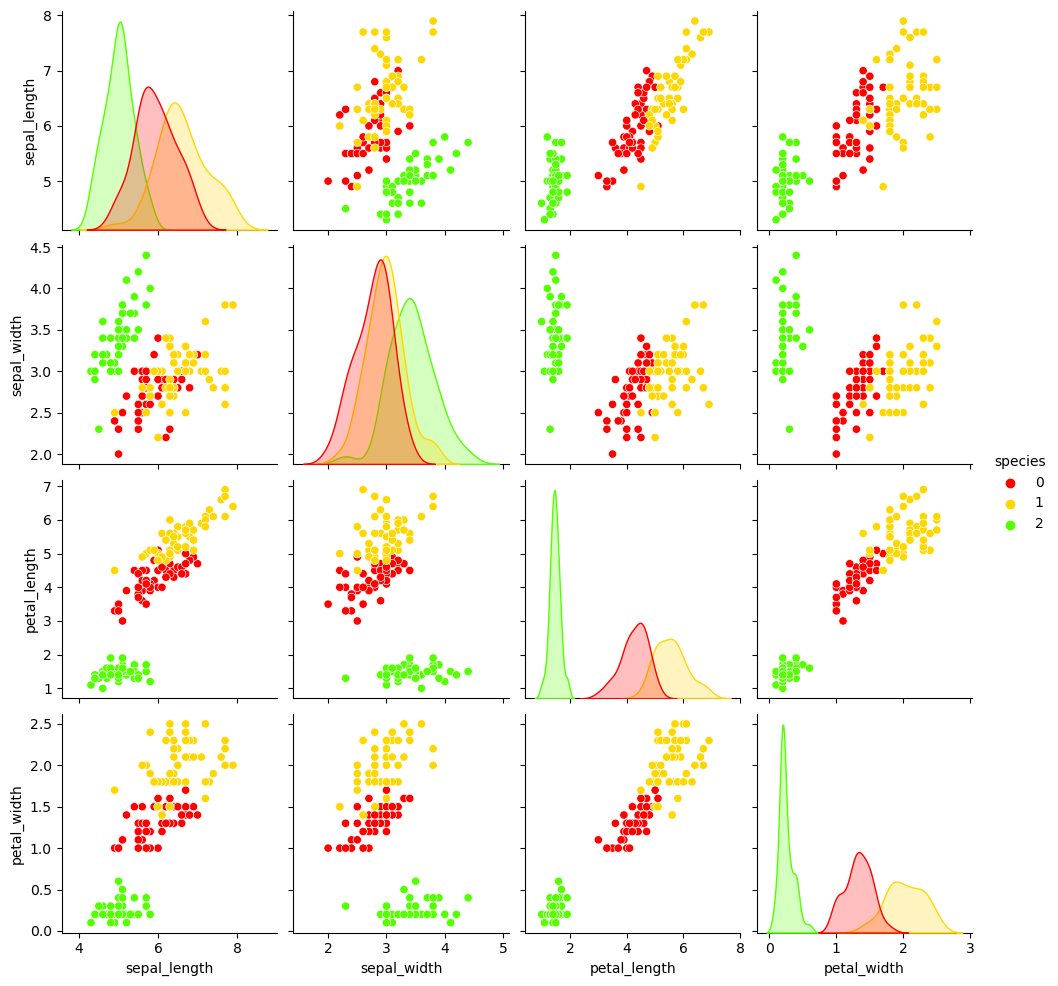

In [13]:
sns.pairplot(df, hue='species', palette = 'prism')

Above pairplot gives bivariate analysis. Petal length and petal width have linear relation.

## Building Model: Random Forest Classifier

In [14]:
# Define x & y
x = df.drop("species", axis = 1)
y = df["species"]

In [15]:
# Train-test-split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [16]:
# Hyperparameter tuning using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

# Defining parameters
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ["auto", "sqrt"]
max_depth = [2,4]
min_samples_split = [2,3]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf,
             "bootstrap":bootstrap}

# Fitting data into GridSearchCV
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [17]:
# Best parameters
print("Best Score: ", rf_Grid.best_score_) 
print("Best Parameters: ", rf_Grid.best_params_)

Best Score:  0.9727227227227228
Best Parameters:  {'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 33}


In [18]:
# Fitting best parameters into RandomForestClassifier
rf_Model = RandomForestClassifier(bootstrap= True,
                                  max_depth= 4,
                                  max_features= 'auto',
                                  min_samples_leaf= 2,
                                  min_samples_split= 2,
                                  n_estimators= 33)
rf_Model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=33)

In [19]:
# Prediction
ypred_rf = rf_Model.predict(x_test)

In [20]:
# Evaluating model using sklearn metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy of the model is: ", accuracy_score(y_test, ypred_rf))
print('-----------------------------------------------------------')
print("Classification Report: \n", classification_report(y_test, ypred_rf))
print('-----------------------------------------------------------')
print("Confusion matrix: \n", confusion_matrix(y_test, ypred_rf))

Accuracy of the model is:  0.9459459459459459
-----------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        14

    accuracy                           0.95        37
   macro avg       0.94      0.94      0.94        37
weighted avg       0.95      0.95      0.95        37

-----------------------------------------------------------
Confusion matrix: 
 [[ 9  1  0]
 [ 1 12  0]
 [ 0  0 14]]


### The accuracy of this machine learning model is 94%. And as can be seen from confusion matrix, there are only two misclassifications.